# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
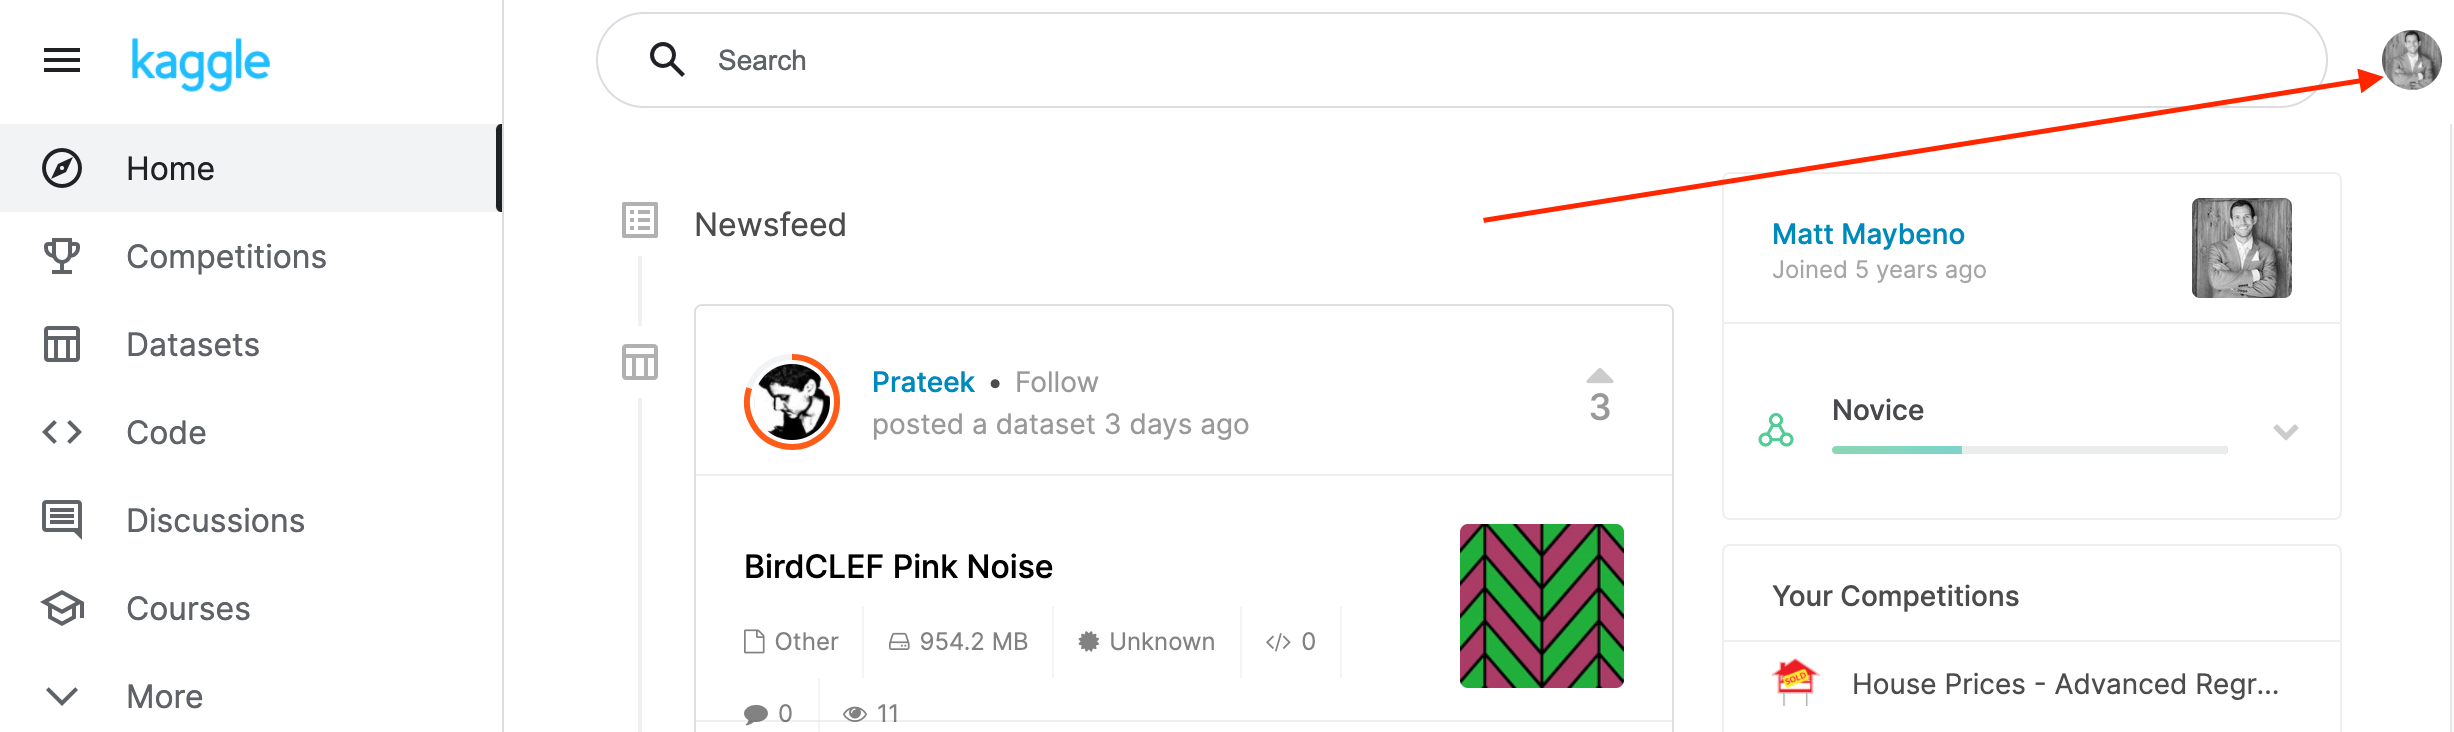
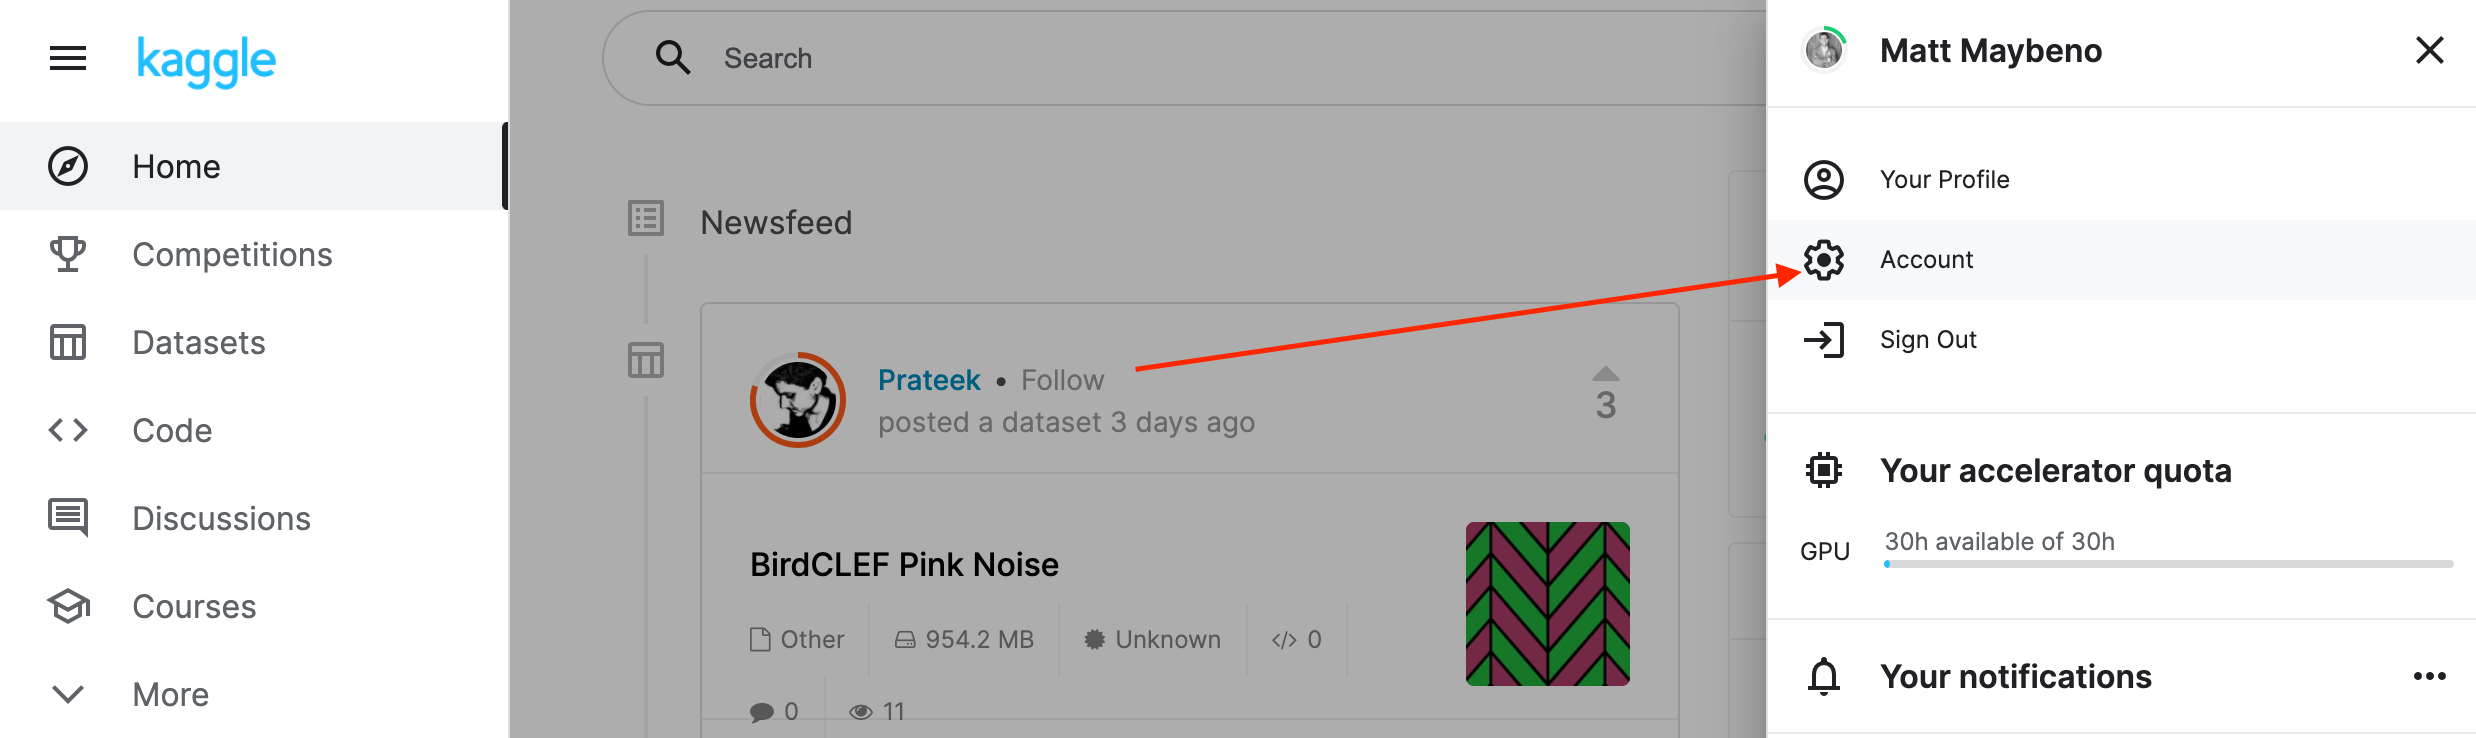
2. Scroll down to API and click Create New API Token.
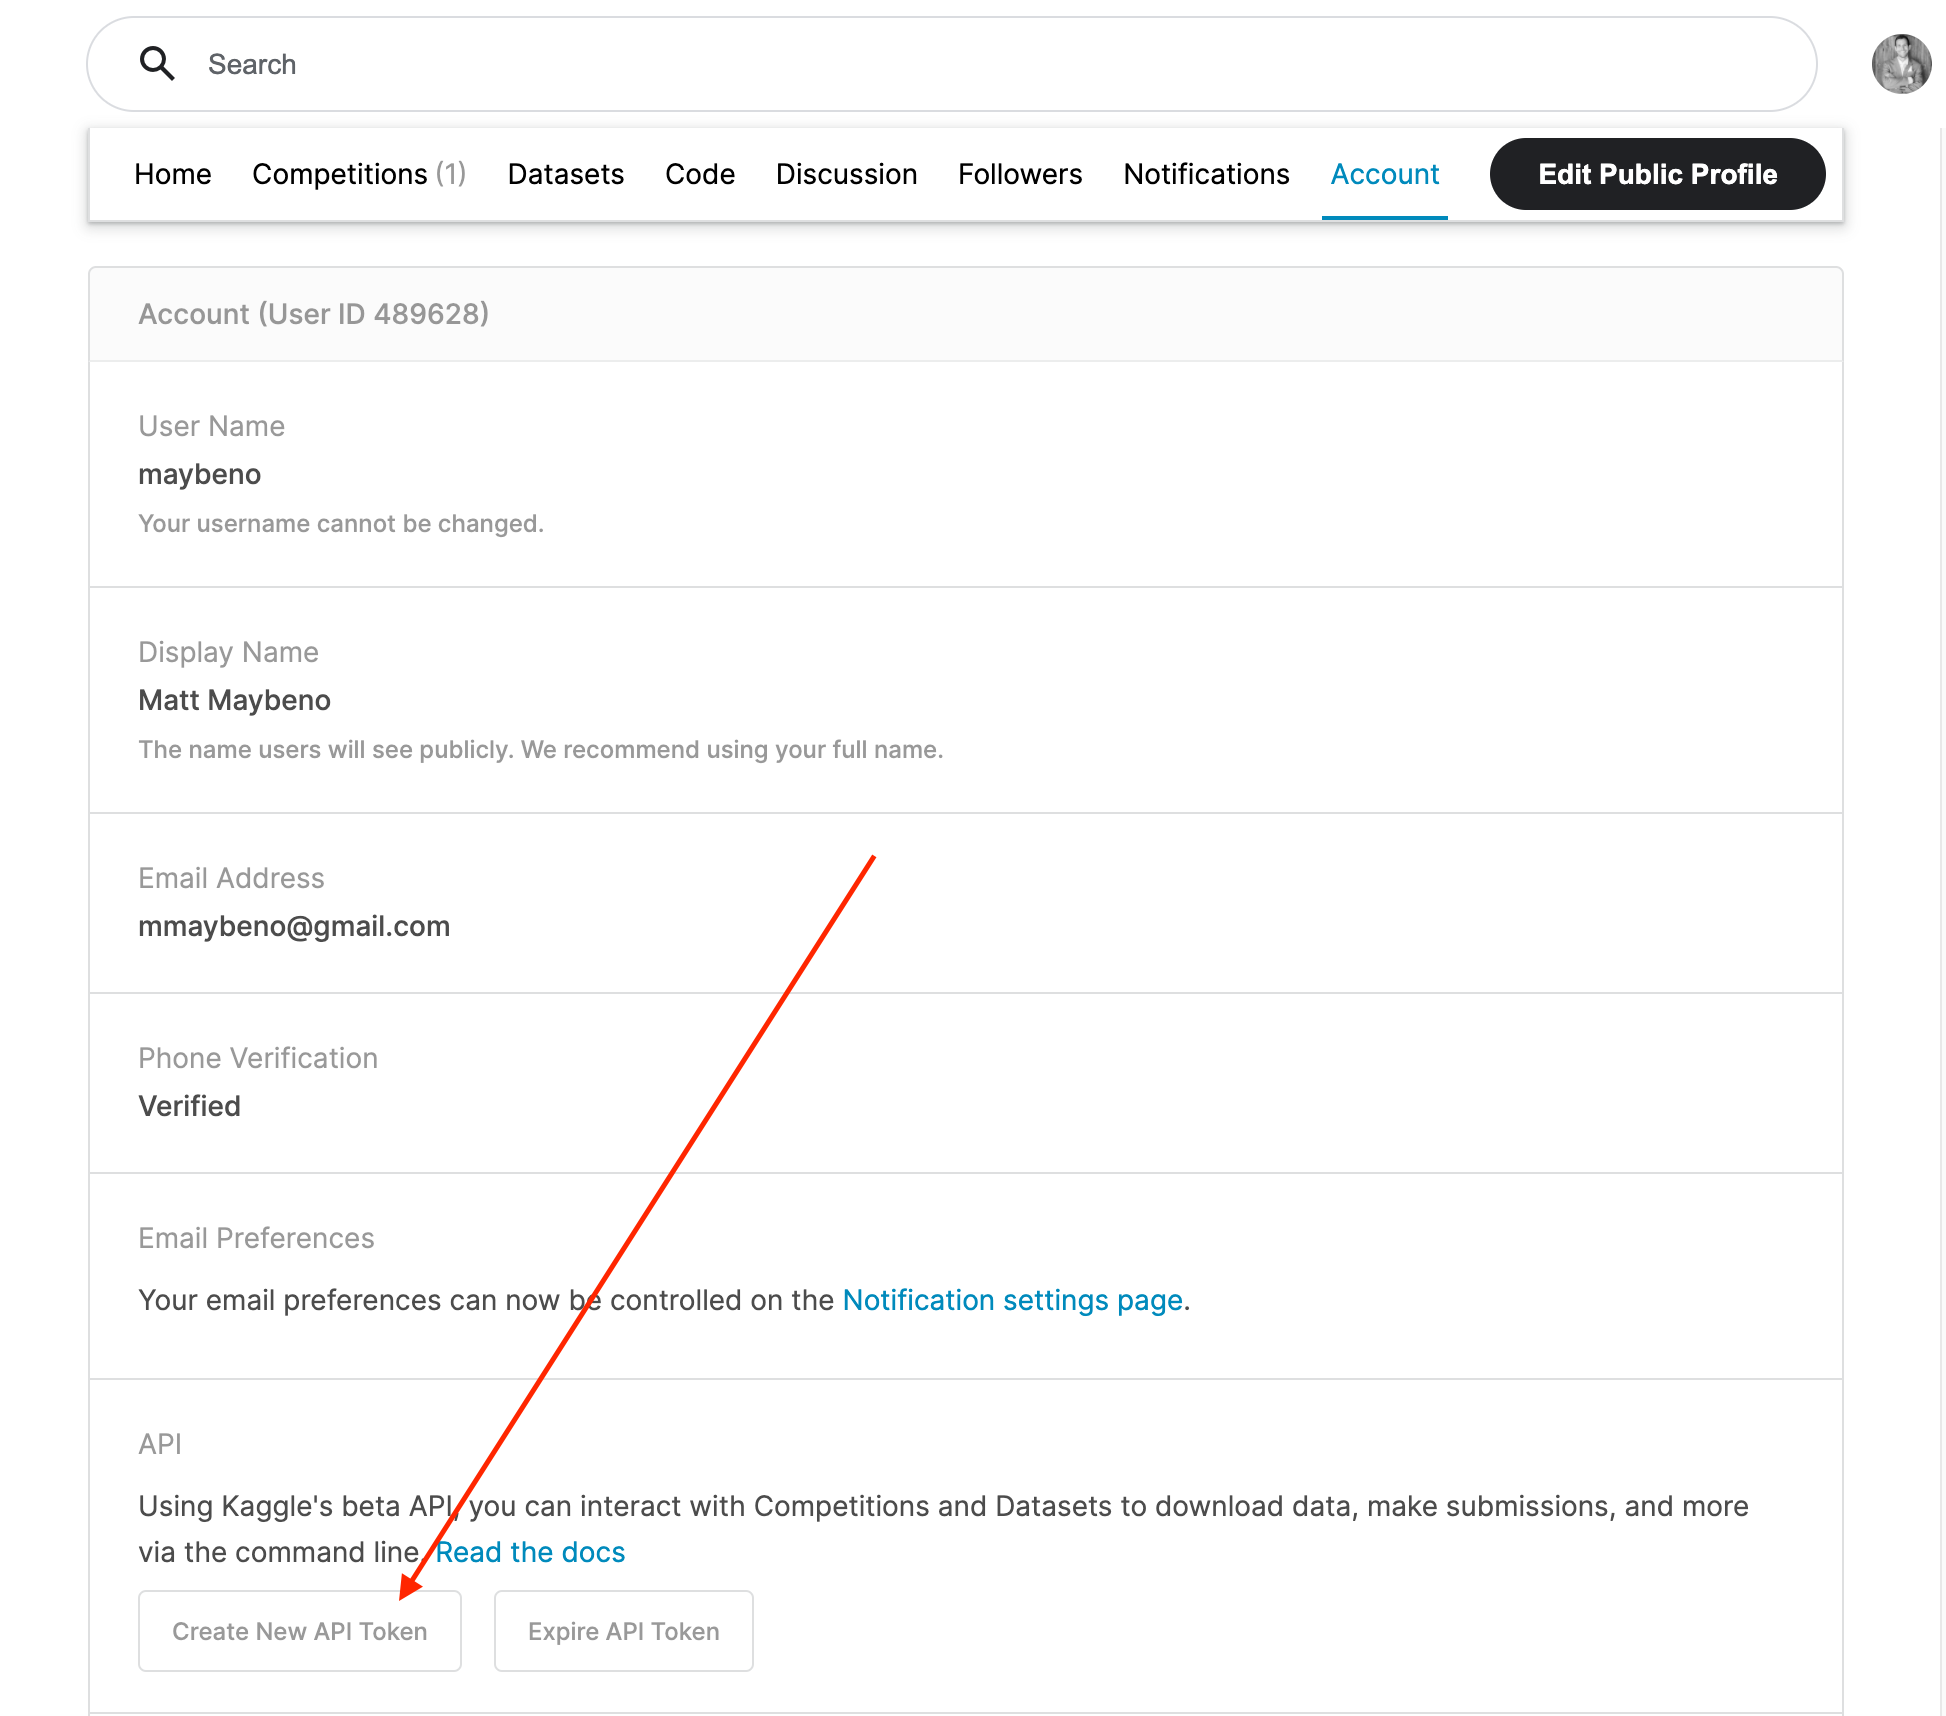
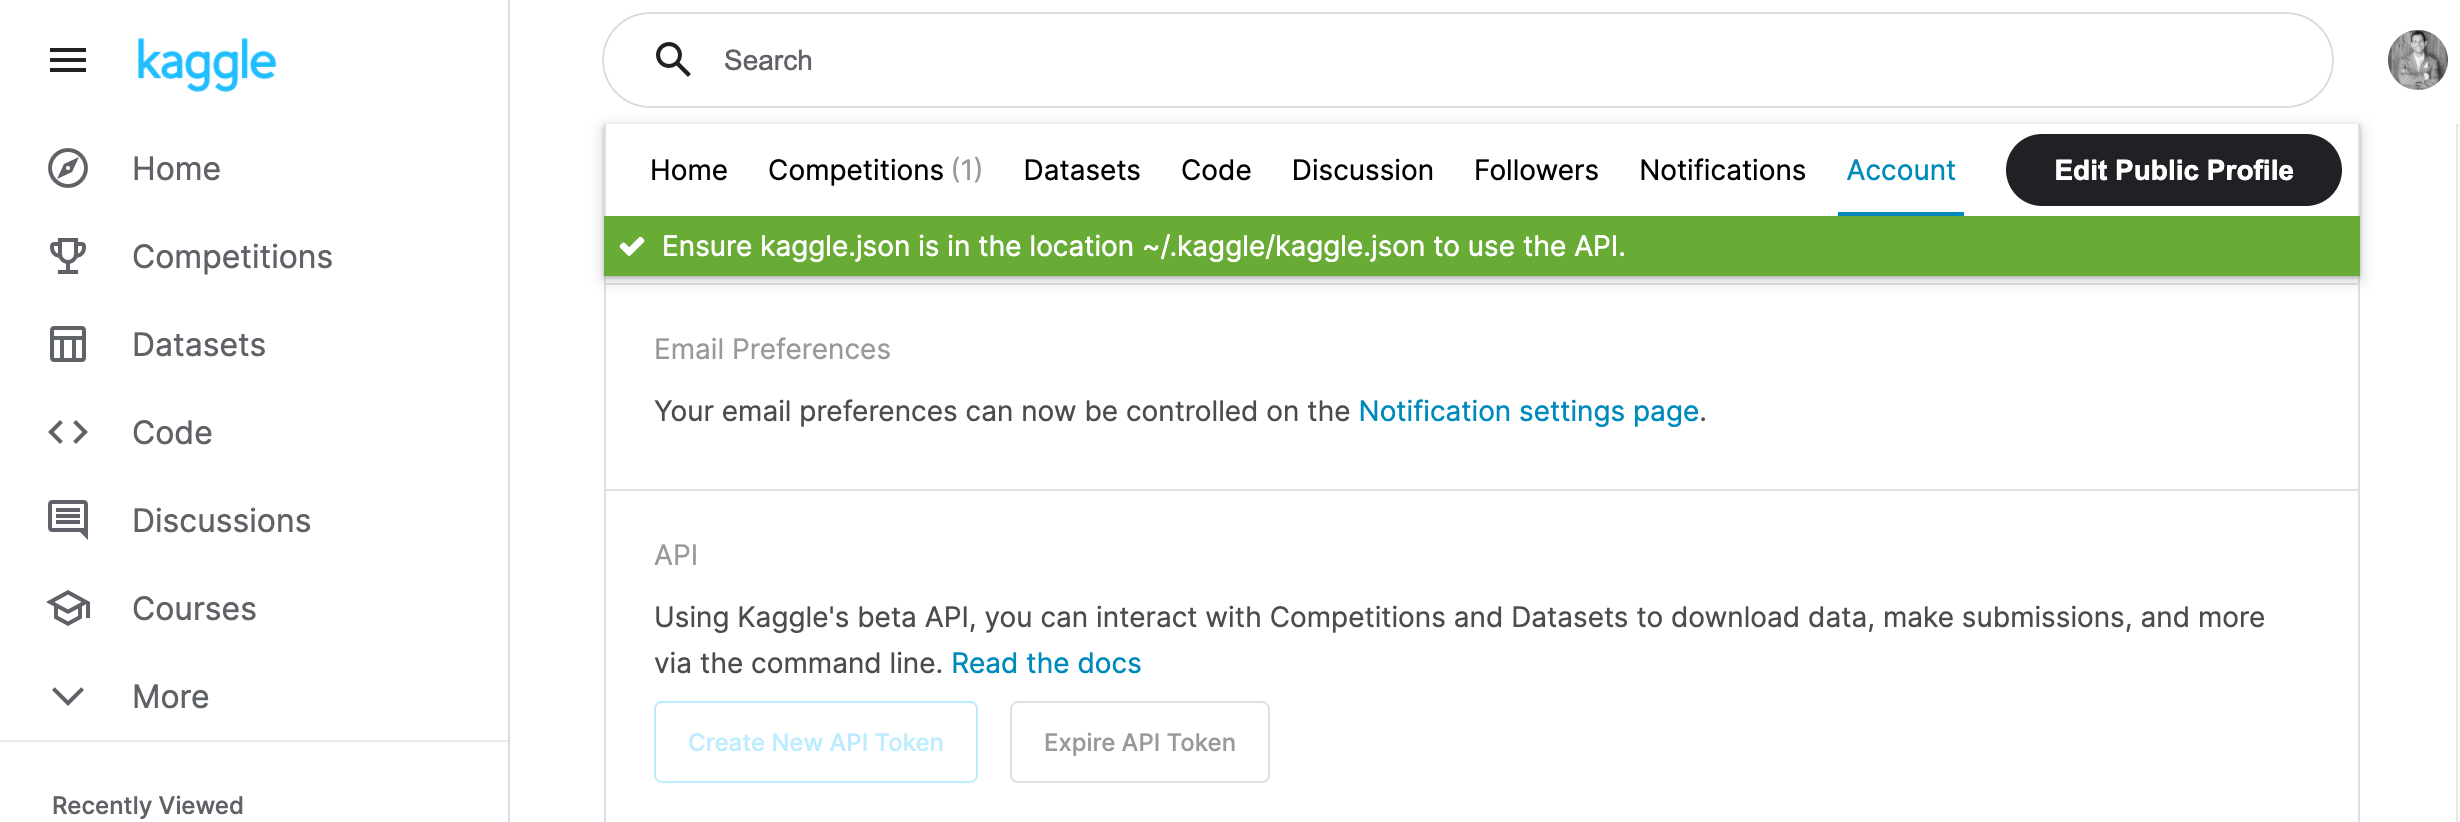
3. Open up `kaggle.json` and use the username and key.
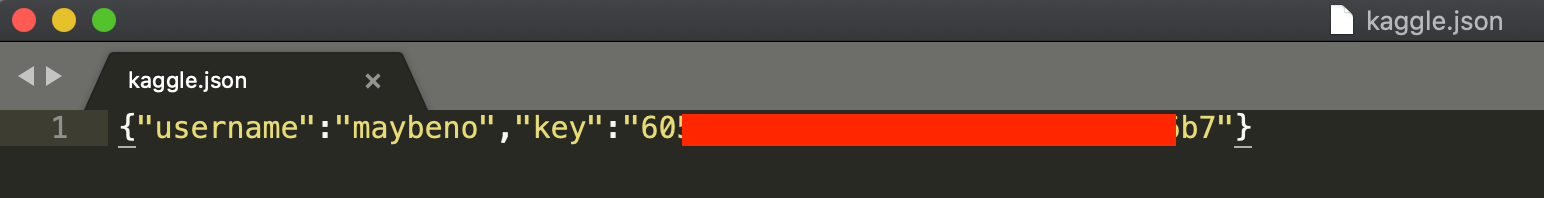

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-67.8.0-py3-none-any.whl (1.1 MB)
  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.5/226.5 kB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 161.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.5/292.5 kB 215.9 MB/s eta 0:00:00
     ━━━━━━━━━━━

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "mikkay"
kaggle_key = "bb57aba28858f5ce32b99ec10c808215"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
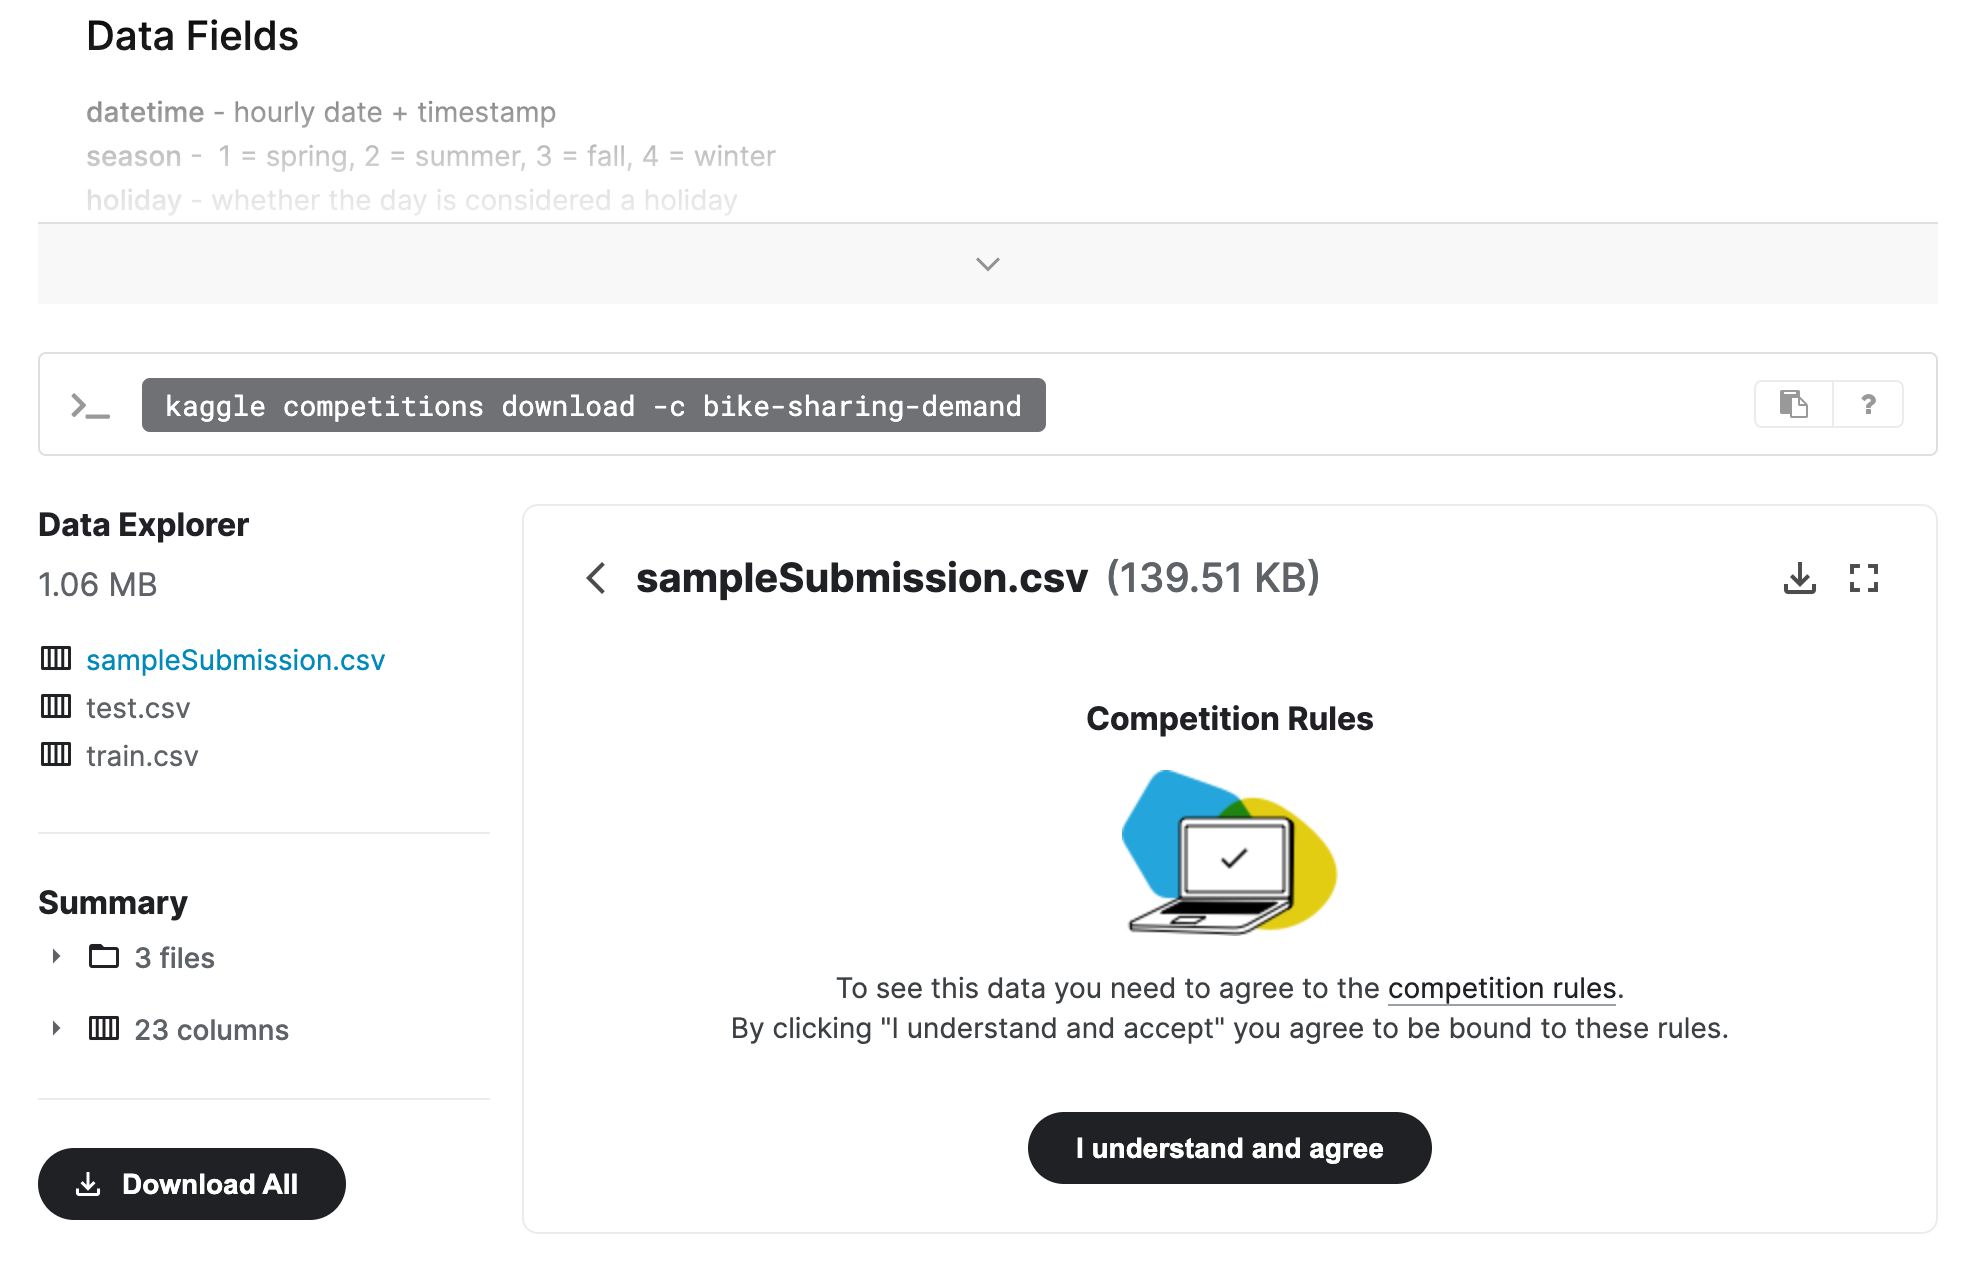

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!pip install kaggle
# !kaggle competitions download -c bike-sharing-demand
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  Using cached kaggle-1.5.13-py3-none-any.whl
  Using cached python_slugify-8.0.1-py2.py3-none-any.whl (9.7 kB)
     |████████████████████████████████| 78 kB 760 kB/s             
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()
train.drop(['casual', 'registered'], axis=1, inplace=True)

In [21]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      23.655084     61.886460     12.799395    191.574132  
std        8.474601     19.245033      8.164537    181.144454  
min        0.760000      0.000000      0.000000      1.000000  
25%       16.665000     47.000000      7.001500     42.000000  
50%       24.240000     62.000000     12.998000    145.000000  
75%       31.060000     77.000000     16.997900    284.000000  
max       45.455000    100.000000     56.996900    977.000000

In [22]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [23]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [25]:
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_data=train,
    time_limit=600,
    presets='best_quality'
)


No path specified. Models will be saved in: "AutogluonModels/ag-20230529_130730/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230529_130730/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

In [26]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

### Review AutoGluon's training run with ranking of models that did the best.

In [27]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.138470      16.905709  560.736897                0.000892           0.284076            3       True         14
1   RandomForestMSE_BAG_L2  -53.476062      12.680439  418.059445                0.614316          27.162866            2       True         12
2          LightGBM_BAG_L2  -55.033166      12.351640  415.954051                0.285517          25.057473            2       True         11
3          CatBoost_BAG_L2  -55.780236      12.143883  449.551179                0.077760          58.654600            2       True         13
4        LightGBMXT_BAG_L2  -60.223298      15.927223  449.577881                3.861100          58.681303            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.103747    0.060077         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

<AxesSubplot:xlabel='model'>

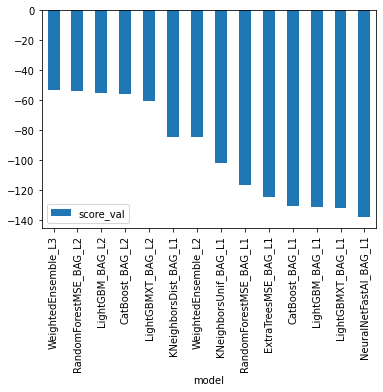

In [28]:
predictor.leaderboard(silent=True).plot(kind='bar', x="model", y="score_val")


### Create predictions from test dataset

In [29]:
predictions = predictor.predict(test)
predictions.head()


0    24.806486
1    42.086899
2    45.744774
3    49.875729
4    52.138767
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [30]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.732918
std        89.873528
min         3.058942
25%        20.146629
50%        64.387299
75%       167.409943
max       365.649231
Name: count, dtype: float64

In [31]:
# How many negative values do we have?
len(predictions[predictions.values <0] )

0

In [32]:
# Set them to zero
predictions[predictions <0] = 0
predictions.describe()

count    6493.000000
mean      100.732918
std        89.873528
min         3.058942
25%        20.146629
50%        64.387299
75%       167.409943
max       365.649231
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [33]:
submission["count"] = predictions.values
submission.to_csv("submission.csv", index=False)

In [34]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|████████████████████████████████████████| 188k/188k [00:02<00:00, 72.7kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [35]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-05-29 13:18:17  first raw submission               complete  1.79580      1.79580       
submission_new_hpo.csv       2023-05-29 01:50:36  new features with hyperparameters  complete  0.54238      0.54238       
submission_new_hpo.csv       2023-05-29 01:48:48  new features with hyperparameters  error                                
submission_new_features.csv  2023-05-29 00:27:11  new features                       complete  0.67967      0.67967       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

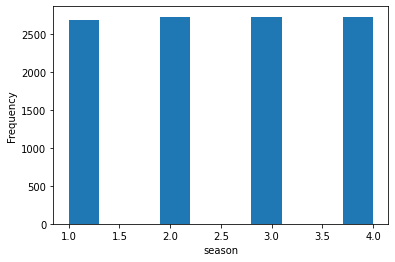

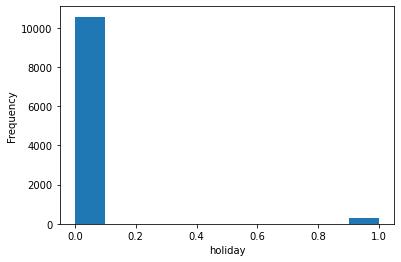

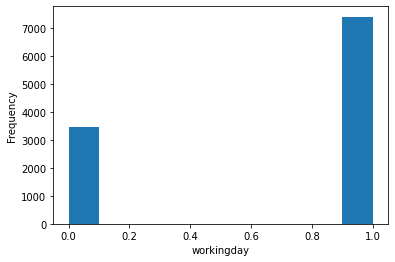

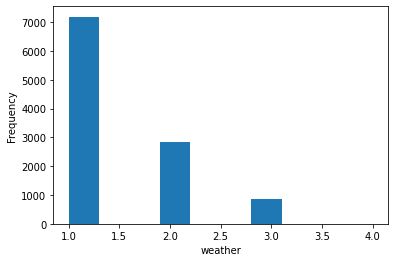

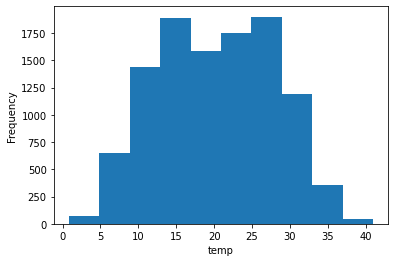

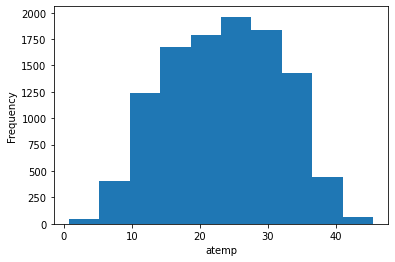

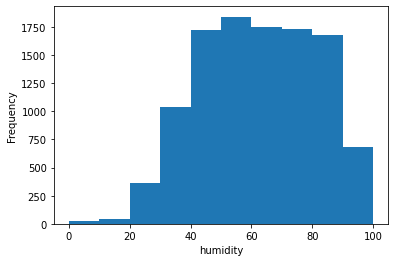

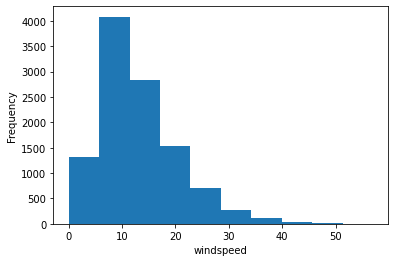

In [36]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
for column in train.columns[1:]:
    train[column].plot(kind='hist', bins=10)
    plt.xlabel(column)
    plt.show()
    


In [37]:
# create a new feature
# train['hour'] = train['datetime'].dt.hour
# test[?] = ?
train['datetime'] = pd.to_datetime(train['datetime'])
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month

test['datetime'] = pd.to_datetime(test['datetime'])
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  hour        10886 non-null  int64         
 11  day         10886 non-null  int64         
 12  month       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 1.1 MB


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [38]:
train["season"] = train.season.astype("category")
train["weather"] = train.weather.astype("category")
test["season"] = test.season.astype("category")
test["weather"] = test.weather.astype("category")

In [39]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  count  hour  day  month  
0        81        0.0     16     0    1      1  
1        80        0.0     40     1    1      1  
2        80        0.0     32     2    1      1  
3        75        0.0     13     3    1      1  
4        75        0.0      1     4    1      1

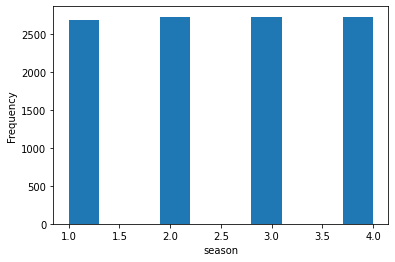

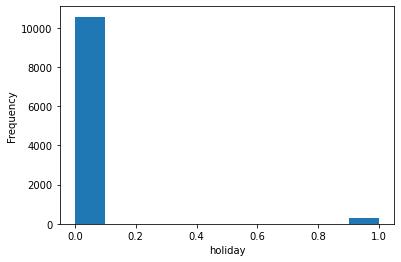

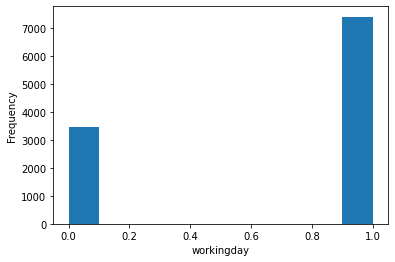

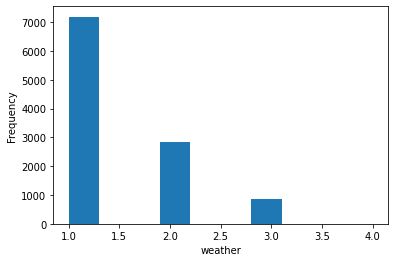

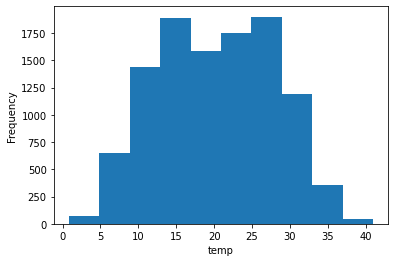

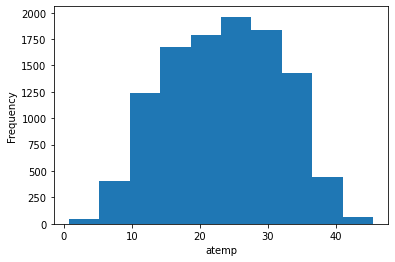

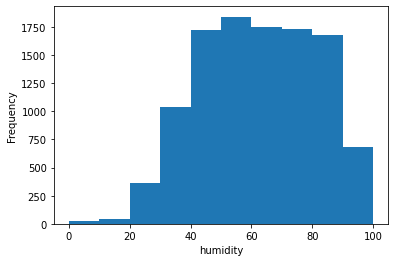

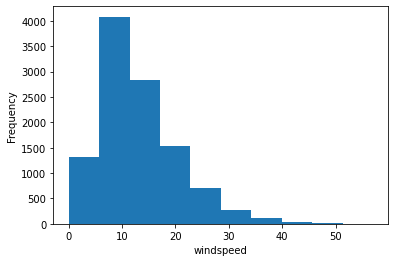

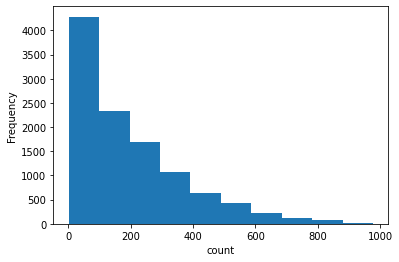

In [9]:
# View histogram of all features again now with the hour feature
import matplotlib.pyplot as plt
for column in train.columns[1:]:
    train[column].plot(kind='hist', bins=10)
    plt.xlabel(column)
    plt.show()




In [10]:
train.corr()

season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   

            humidity  windspeed     count  
season      0.190610  -0.147121  0.163439  
holiday     0.001929   0.008409 -0.005393  
workingday -0.010880   0.013373  0.011594  
weather     0.406244   0.007261 -0.128655  
temp       -0.064949  -0.017852  0.394454  
atemp      -0.043536  -0.057473  0.389784  
humidity    1.000000  -0.318607 -0.317371  
windspeed  -0.318607   1.000000  0.101369  
count      -0.317371   0.101369  1.000000

## Step 5: Rerun the model with the same settings as before, just with more features

In [42]:
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train,
                                                                                             time_limit = 600,
                                                                                             presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230529_132053/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230529_132053/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [43]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.304206      21.115467  553.743022                0.000909           0.295690            3       True         14
1          CatBoost_BAG_L2  -30.543722      19.370737  466.202194                0.161866          73.789870            2       True         13
2          LightGBM_BAG_L2  -30.684990      19.590644  418.402136                0.381773          25.989811            2       True         11
3        LightGBMXT_BAG_L2  -31.340321      19.940155  421.737272                0.731283          29.324947            2       True         10
4   RandomForestMSE_BAG_L2  -31.692909      19.839635  424.342704                0.630764          31.930379            2       True         12
5      WeightedEnsemble_L2  -32.148732      18.044044  347.726812         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.520779536614505,
  'LightGBM_BAG_L1': -33.916920183145294,
  'RandomForestMSE_BAG_L1': -38.4

In [44]:
# Remember to set all negative values to zero
predictions = predictor_new_features.predict(test)

In [45]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions.values
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [46]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features(rmse)"

100%|████████████████████████████████████████| 188k/188k [00:02<00:00, 74.4kB/s]
Successfully submitted to Bike Sharing Demand

In [47]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-29 13:34:36  new features(rmse)                 complete  0.67563      0.67563       
submission.csv               2023-05-29 13:18:17  first raw submission               complete  1.79580      1.79580       
submission_new_hpo.csv       2023-05-29 01:50:36  new features with hyperparameters  complete  0.54238      0.54238       
submission_new_hpo.csv       2023-05-29 01:48:48  new features with hyperparameters  error                                


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [54]:
hyperparameters = {
    'GBM': {'learning_rate': 0.001},
    'RF': {'n_estimators': (50, 200), },
    'KNN': {'n_neighbors': (3, 10), 'weights':'distance'},
    
}

hyperparameter_tune_kwargs = {
    'num_trials': 10,
    'search_strategy': 'random',
    'scheduler': 'local',
    'searcher':'random'
    
}

predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train,
                                                                                             time_limit = 600,
                                                                                             hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                                             presets="best_quality",
                                                                                             hyperparameters=hyperparameters)

No path specified. Models will be saved in: "AutogluonModels/ag-20230529_140725/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230529_140725/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [55]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   LightGBM_BAG_L2/T1 -36.329754      41.001646  452.252009                0.000134         142.311016            2       True          3
1  WeightedEnsemble_L3 -36.329754      41.002832  452.258479                0.001186           0.006470            3       True          4
2   LightGBM_BAG_L1/T1 -36.718343      41.001512  309.940993               41.001512         309.940993            1       True          1
3  WeightedEnsemble_L2 -36.718343      41.005059  309.945436                0.003547           0.004443            2       True          2
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)
Feature Metadata (Processed):
(raw dtype, sp

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -36.718343412719165,
  'WeightedEnsemble_L2': -36.718343412719165,
  'LightGBM_BAG_L2/T1': -36.32975430940216,
  'WeightedEnsemble_L3': -36.32975430940216},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1/T1': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230529_140725/models/LightGBM_BAG_L1/T1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230529_140725/models/WeightedEnsemble_L2/',
  'LightGBM_BAG_L2/T1': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230529_140725/models/LightGBM_BAG_L2/T1/',
  'WeightedEnsemble_L3': 'AutogluonModels/ag-20230529_140725/models/WeightedEnsemble_L3/'},
 'model_fit_times': {'LightGBM_BAG_L1/T1': 309.9409930706024,
  'WeightedEnsemble_L2': 0.0

In [56]:
# Remember to set all negative values to zero
predictions = predictor_new_hpo.predict(test)
predictions[predictions<0] = 0


In [57]:
# Same submitting predictions
submission_new_hpo  = pd.read_csv('submission.csv')
submission_new_hpo["count"] = predictions.values
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [58]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters(rmse)"

100%|████████████████████████████████████████| 188k/188k [00:02<00:00, 65.0kB/s]
Successfully submitted to Bike Sharing Demand

In [59]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                              status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-29 14:23:55  new features with hyperparameters(rmse)  complete  0.47225      0.47225       
submission_new_features.csv  2023-05-29 13:34:36  new features(rmse)                       complete  0.67563      0.67563       
submission.csv               2023-05-29 13:18:17  first raw submission                     complete  1.79580      1.79580       
submission_new_hpo.csv       2023-05-29 01:50:36  new features with hyperparameters        complete  0.54238      0.54238       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

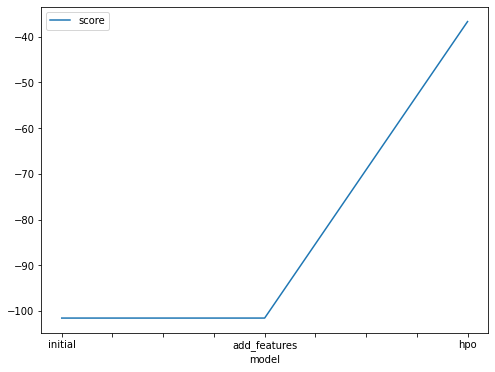

In [5]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-101.546199, -101.546199, -36.718343]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [60]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79580, 0.67563, 0.47225]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [4]:
# The 3 hyperparameters we tuned with the kaggle score as the result
import pandas as pd
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "training_time": [600, 600, 600],
    "GMB_learning_rate": [0.1,0.1, 0.001],
    "num_trials": [5, 5, 10],
    "score": [ 1.79580, 0.67563, 0.47225]
})

model  training_time  GMB_learning_rate  num_trials    score
0       initial            600              0.100           5  1.79580
1  add_features            600              0.100           5  0.67563
2           hpo            600              0.001          10  0.47225